<a href="https://colab.research.google.com/github/Deadkiller43/MLBasics/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing all the required libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

###Loading the dataset into pandas
displaying the names of the columns

In [5]:
top = pd.read_csv("/content/Top Indian Places to Visit.csv")
top.columns

Index(['Unnamed: 0', 'Zone', 'State', 'City', 'Name', 'Type',
       'Establishment Year', 'time needed to visit in hrs',
       'Google review rating', 'Entrance Fee in INR',
       'Airport with 50km Radius', 'Weekly Off', 'Significance',
       'DSLR Allowed', 'Number of google review in lakhs',
       'Best Time to visit'],
      dtype='object')

###By the shape function we know that there are total of 325 observations with each 16 features
By the analysing we will ensure that which features are important to display and not

In [6]:
top.shape

(325, 16)

###Reviewing the some data randomly

In [ ]:
top.sample(5)

,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
136,136,Central,Madhya Pradesh,Khajuraho,Khajuraho Group of Monuments,Temples,-850,2.0,4.7,40,No,NaN,Cultural,Yes,0.090,Afternoon
185,185,Central,Uttar Pradesh,Ayodhya,Ram Janmabhoomi,Religious Site,Unknown,1.0,4.8,0,Yes,NaN,Religious,No,0.025,All
72,72,Western,Gujarat,Rann of Kutch,Rann Utsav,Cultural,Unknown,3.0,4.9,7500,Yes,NaN,Cultural,Yes,0.100,Evening
143,143,Central,Madhya Pradesh,Kanha,Kanha National Park,Wildlife Sanctuary,1955,3.0,4.5,100,No,NaN,Wildlife,Yes,0.100,Morning
88,88,Northern,Rajasthan,Bikaner,Junagarh Fort,Fort,1589,2.0,4.5,50,Yes,NaN,Historical,Yes,0.320,All


By reviewing the sample we found that Unnamed column is useless for us &
DSLR Allowed also & Number of google review in lakhs so we are removing the columns from the dataset

In [8]:
top.drop(['Unnamed: 0','DSLR Allowed','Number of google review in lakhs'],axis=1,inplace=True)
top

,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,Best Time to visit
0,Northern,Delhi,Delhi,India Gate,War Memorial,1921,0.5,4.6,0,Yes,NaN,Historical,Evening
1,Northern,Delhi,Delhi,Humayun's Tomb,Tomb,1572,2.0,4.5,30,Yes,NaN,Historical,Afternoon
2,Northern,Delhi,Delhi,Akshardham Temple,Temple,2005,5.0,4.6,60,Yes,NaN,Religious,Afternoon
3,Northern,Delhi,Delhi,Waste to Wonder Park,Theme Park,2019,2.0,4.1,50,Yes,Monday,Environmental,Evening
4,Northern,Delhi,Delhi,Jantar Mantar,Observatory,1724,2.0,4.2,15,Yes,NaN,Scientific,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Western,Gujarat,Gandhinagar,Akshardham,Temple,1992,3.0,4.6,0,Yes,Monday,Religious,All
321,Central,Uttar Pradesh,Agra,Agra Fort,Fort,1565,2.0,4.5,40,Yes,NaN,Historical,Afternoon
322,Central,Madhya Pradesh,Bhopal,Madhya Pradesh Tribal Museum,Museum,2013,2.0,4.7,10,Yes,Monday,Cultural,All
323,Northern,Rajasthan,Jaipur,City Palace,Palace,1727,2.0,4.4,200,Yes,NaN,Historical,Morning


####By the observation we understand many values are missed in the column ['Weekly Off'] so we have to find the solution

In [9]:
top.isnull().sum()

,0
Zone,0
State,0
City,0
Name,0
Type,0
Establishment Year,0
time needed to visit in hrs,0
Google review rating,0
Entrance Fee in INR,0
Airport with 50km Radius,0


###For sloving the problem with the missing values

,count
Significance,
Historical,78
Religious,75
Nature,47
Recreational,30
Wildlife,29
Cultural,13
Scenic,10
Shopping,7
Entertainment,5


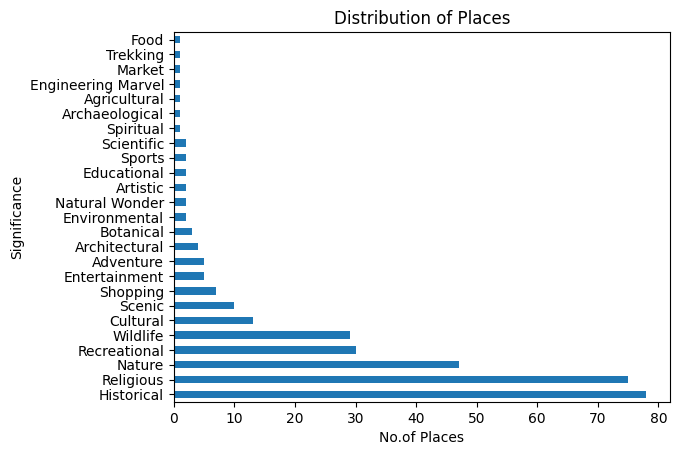

In [ ]:
a = top['Significance'].value_counts().plot(kind='barh')
a.set_xlabel('No.of Places')
a.set_title('Distribution of Places')
top['Significance'].value_counts()

####By seeing the plot & significance data there are only each or two places in the overall india so there is no choice for them so we removing the significance with least no.of places

In [14]:
grouped = top.groupby('Significance')
top = grouped.filter(lambda x: len(x) > 4)
top['Significance'].value_counts()
#grouped.count()

,count
Significance,
Historical,78
Religious,75
Nature,47
Recreational,30
Wildlife,29
Cultural,13
Scenic,10
Shopping,7
Entertainment,5


By the code above we have filtered the significance to the least values

In [15]:
grouped.count()

,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Best Time to visit
Significance,,,,,,,,,,,,
Adventure,5,5,5,5,5,5,5,5,5,5,0,5
Cultural,13,13,13,13,13,13,13,13,13,13,3,13
Entertainment,5,5,5,5,5,5,5,5,5,5,1,5
Historical,78,78,78,78,78,78,78,78,78,78,15,78
Nature,47,47,47,47,47,47,47,47,47,47,0,47
Recreational,30,30,30,30,30,30,30,30,30,30,1,30
Religious,75,75,75,75,75,75,75,75,75,75,2,75
Scenic,10,10,10,10,10,10,10,10,10,10,0,10
Shopping,7,7,7,7,7,7,7,7,7,7,0,7


By the observation we found there are how many places related to the significance and based on each significance I will assign a value to the weekly off column.
For example Religious, Nature, Adventure, Wildlife, Recreational places are open without any holidays so I will give the True value for the associated places.

In [36]:
top.loc[top['Significance'].isin(['Religious', 'Nature', 'Adventure', 'Wildlife', 'Recreational', 'Scenic']), 'Weekly Off'] = False

In [37]:
top

,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,Best Time to visit
0,Northern,Delhi,Delhi,India Gate,War Memorial,1921,0.5,4.6,0,Yes,Yes,Historical,Evening
1,Northern,Delhi,Delhi,Humayun's Tomb,Tomb,1572,2.0,4.5,30,Yes,Yes,Historical,Afternoon
2,Northern,Delhi,Delhi,Akshardham Temple,Temple,2005,5.0,4.6,60,Yes,False,Religious,Afternoon
6,Northern,Delhi,Delhi,Lotus Temple,Temple,1986,1.0,4.5,0,Yes,False,Religious,Evening
7,Northern,Delhi,Delhi,Red Fort,Fort,1648,2.0,4.5,35,Yes,Yes,Historical,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Western,Gujarat,Gandhinagar,Akshardham,Temple,1992,3.0,4.6,0,Yes,False,Religious,All
321,Central,Uttar Pradesh,Agra,Agra Fort,Fort,1565,2.0,4.5,40,Yes,Yes,Historical,Afternoon
322,Central,Madhya Pradesh,Bhopal,Madhya Pradesh Tribal Museum,Museum,2013,2.0,4.7,10,Yes,Yes,Cultural,All
323,Northern,Rajasthan,Jaipur,City Palace,Palace,1727,2.0,4.4,200,Yes,Yes,Historical,Morning


The following plot shows that which region has the highest places to travel

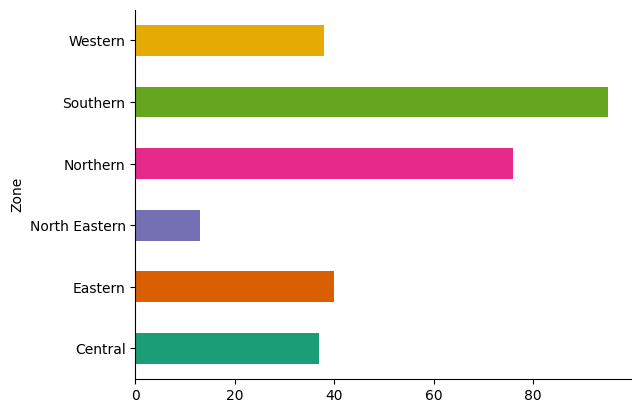

In [44]:
top.groupby('Zone').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

The following plot shows the best time to visit the places

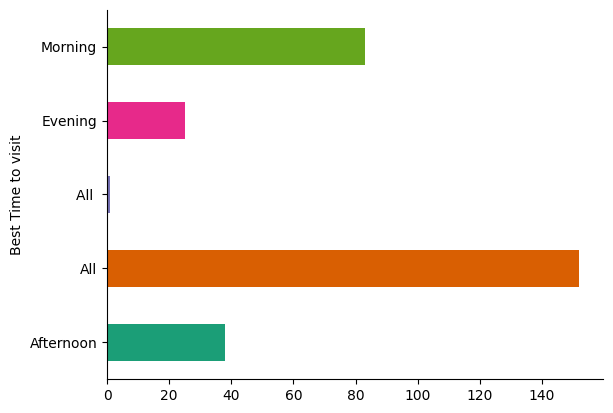

In [46]:
top.groupby('Best Time to visit').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)